<a href="https://colab.research.google.com/github/Thales-Gabriel-Soares-Amorim/PVI-modeloSIR/blob/main/PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

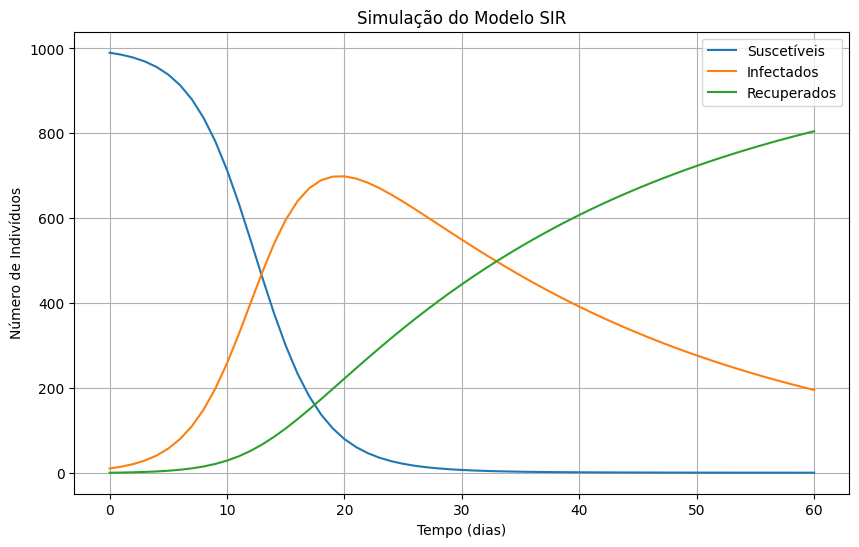

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
beta = 0.4 #Coeficiente de transmissão da doença
gamma = 0.035 # Taxa de recuperação/cura dos infectados
N0 = 1000  # População total inicial

# Condições iniciais
tinicial = 0 #tempo inicial
Sinicial = 990 #suscetíveis inicial
Iinicial = 10 #infectados inicial
Rinicial = 0 # recuperados inicial
N = N0

# Funções das equações diferenciais
def dSdt(S, I):
    return -(beta / N) * S * I

def dIdt(S, I):
    return (beta / N) * S * I - gamma * I

def dRdt(I):
    return gamma * I

# Método de Runge-Kutta de ordem 2
def runge_kutta_step(S, I, R, dt):
    S1 = dSdt(S, I)
    I1 = dIdt(S, I)
    R1 = dRdt(I)

    S2 = dSdt(S + 0.5 * dt * S1, I + 0.5 * dt * I1)
    I2 = dIdt(S + 0.5 * dt * S1, I + 0.5 * dt * I1)
    R2 = dRdt(I + 0.5 * dt * I1)

    S_new = S + dt * S2
    I_new = I + dt * I2
    R_new = R + dt * R2

    return S_new, I_new, R_new

# Simulação
T = 60  # dias
dt = 1  # passo de tempo
num_passos = int(T / dt)

time_points = np.linspace(tinicial, T, num_passos + 1)
S_values = [Sinicial]
I_values = [Iinicial]
R_values = [Rinicial]

for i in range(num_passos):
    S_new, I_new, R_new = runge_kutta_step(S_values[-1], I_values[-1], R_values[-1], dt)
    S_values.append(S_new)
    I_values.append(I_new)
    R_values.append(R_new)

# Plotagem das curvas
plt.figure(figsize=(10, 6))
plt.plot(time_points, S_values, label='Suscetíveis') #linha de suscetíveis
plt.plot(time_points, I_values, label='Infectados') #linha de infectados
plt.plot(time_points, R_values, label='Recuperados') #linha de recuperados
plt.xlabel('Tempo (dias)') #eixo x
plt.ylabel('Número de Indivíduos') #eixo y
plt.title('Simulação do Modelo SIR')
plt.legend()
plt.grid()
plt.show()

Aluno: Thales Gabriel Soares Amorim

O exercicio pede o uso do método Runge-Kutta de ordem 2 para resolver esta PVI sobre o âmbito da epidemiologia matemática usando o modelo SIR em uma simulação de 60 dias através de um código python. E com o uso dos gráficos mmontados, tentar responder as seguintes perguntas:

• Após quantos dias aconteçe o pico de epidemia?

R: Entre 10 e 30 dias acontece o pico da epidemia, onde o número de infectados é superior ao número de suscetíveis e recuperados.

• Após quantos dias pode-se considerar que a epidemia está “controlada”?

R: Após 30 dias, onde o número de recuperados é maior que o número de infectados.